Intervalo b: La función debe cambiar de signo en el intervalo.
Intervalo e: La función debe cambiar de signo en el intervalo.


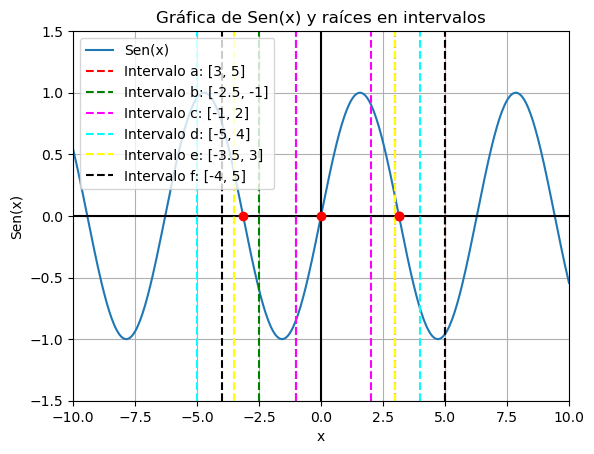

Intervalo a:
 Raíz aproximada: 3.1415929794311523
 Solución esperada: -3.141592653589793
-----
Intervalo b:
 Raíz aproximada: None
 Solución esperada: 0
-----
Intervalo c:
 Raíz aproximada: -2.384185791015625e-07
 Solución esperada: 3.141592653589793
-----
Intervalo d:
 Raíz aproximada: -3.14159232378006
 Solución esperada: Error (sin cambio de signo)
-----
Intervalo e:
 Raíz aproximada: None
 Solución esperada: 3.141592653589793
-----
Intervalo f:
 Raíz aproximada: 3.14159232378006
 Solución esperada: Error (sin cambio de signo)
-----


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función a evaluar
def f(x):
    return np.sin(x)

# Método de la Bisección
def biseccion(funcion, extremo_izq, extremo_der, tolerancia=1e-6, iteraciones_max=100):
    if funcion(extremo_izq) * funcion(extremo_der) >= 0:
        raise ValueError("La función debe cambiar de signo en el intervalo.")

    iteraciones = 0
    while (extremo_der - extremo_izq) / 2 > tolerancia and iteraciones < iteraciones_max:
        punto_medio = (extremo_izq + extremo_der) / 2
        if funcion(punto_medio) == 0:
            return punto_medio, iteraciones
        elif funcion(extremo_izq) * funcion(punto_medio) < 0:
            extremo_der = punto_medio
        else:
            extremo_izq = punto_medio
        iteraciones += 1
    return (extremo_izq + extremo_der) / 2, iteraciones

# Parámetros y datos
dominio = np.linspace(-10, 10, 400)
valores = f(dominio)

# Visualización
plt.plot(dominio, valores, label="Sen(x)")
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# Intervalos a evaluar
intervalos = [(3, 5), (-2.5, -1), (-1, 2),(-5, 4), (-3.5, 3), (-4, 5),   ]
colores = ['red', 'green', 'magenta', 'cyan', 'yellow', 'black']
raices = []

for indice, (inicio, fin) in enumerate(intervalos):
    plt.axvline(inicio, color=colores[indice], linestyle='--', 
                label=f"Intervalo {chr(97+indice)}: [{inicio}, {fin}]")
    plt.axvline(fin, color=colores[indice], linestyle='--')

    try:
        raiz, _ = biseccion(f, inicio, fin)
        raices.append(raiz)
        plt.plot(raiz, f(raiz), 'ro')
    except ValueError as error:
        raices.append(None)
        print(f"Intervalo {chr(97+indice)}: {error}")

# Detalles del gráfico
plt.xlim(-10, 10)
plt.ylim(-1.5, 1.5)
plt.title("Gráfica de Sen(x) y raíces en intervalos")
plt.xlabel("x")
plt.ylabel("Sen(x)")
plt.legend()
plt.grid(True)
plt.show()

# Resultados detallados
soluciones_esperadas = [-np.pi, 0, np.pi, "Error (sin cambio de signo)", np.pi,
                        "Error (sin cambio de signo)"]
for indice, raiz in enumerate(raices):
    print(f"Intervalo {chr(97+indice)}:")
    print(f" Raíz aproximada: {raiz}")
    print(f" Solución esperada: {soluciones_esperadas[indice]}")
    print("-----")